In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv(r'C:\Users\sahithi aharam\Downloads\sales\car_purchasing.csv',encoding='latin-1')
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [4]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [5]:
df.isnull().any()

customer name          False
customer e-mail        False
country                False
gender                 False
age                    False
annual Salary          False
credit card debt       False
net worth              False
car purchase amount    False
dtype: bool

In [6]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [7]:
df = df.drop(['customer name', 'customer e-mail', 'country'], axis=1)
df

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


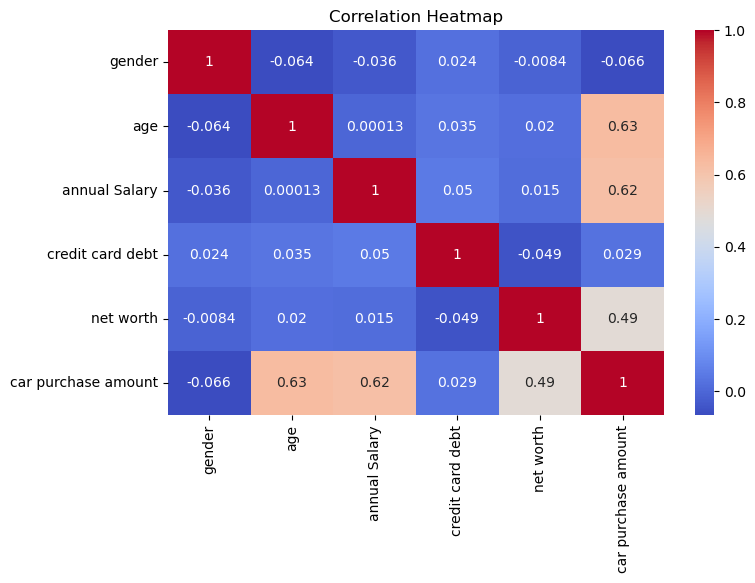

In [9]:
# Correlation Heatmap to visualize feature correlations
correlation_matrix = df.corr()
plt.figure(figsize=(8, 5))
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


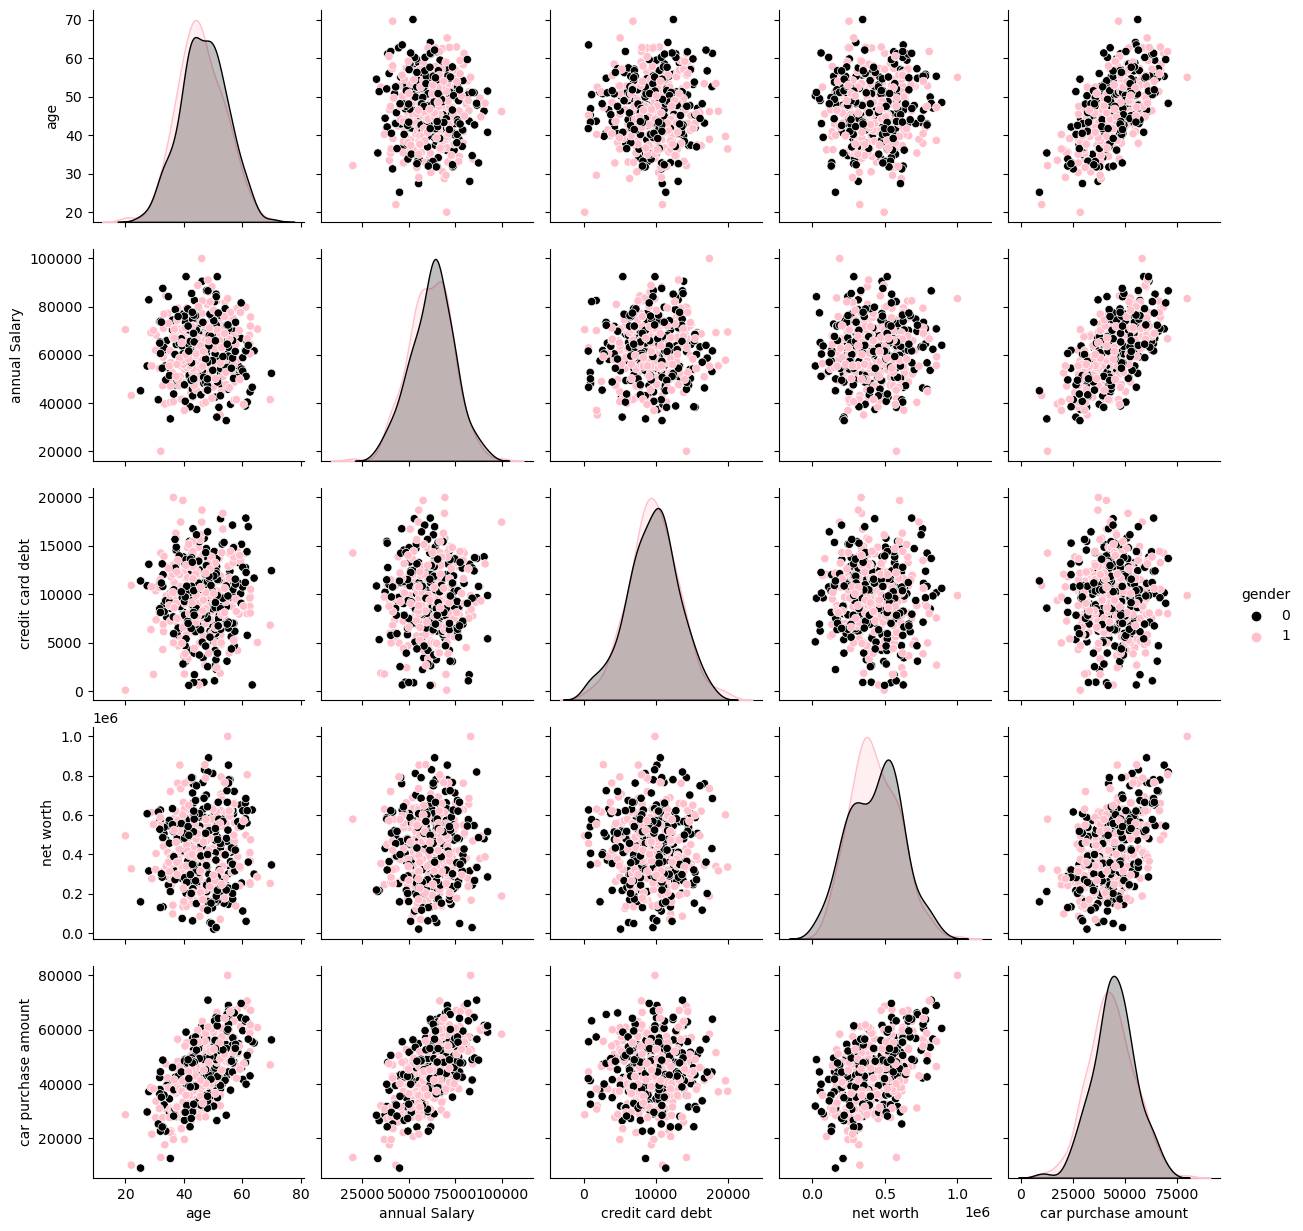

In [10]:
custom_palette = {1: "pink", 0: "black"}


sn.pairplot(df, hue="gender", palette=custom_palette)
plt.show()

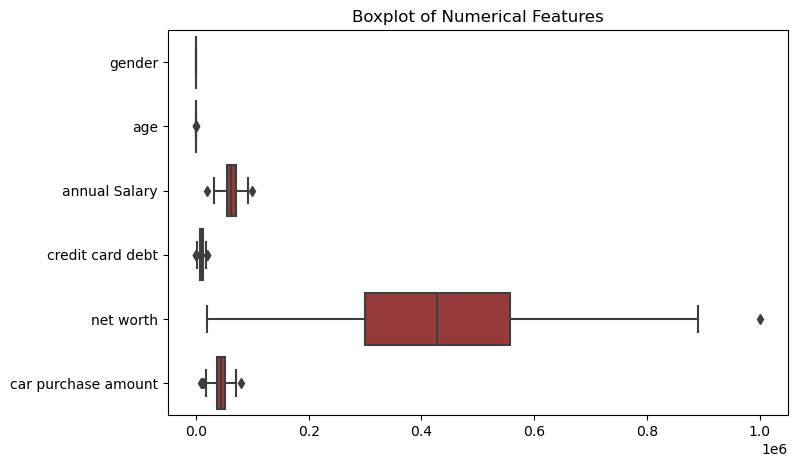

In [12]:
# Boxplot to visualize the distribution of numerical features
plt.figure(figsize=(8, 5))
sn.boxplot(data=df, orient="h",color='brown')
plt.title("Boxplot of Numerical Features")
plt.show()

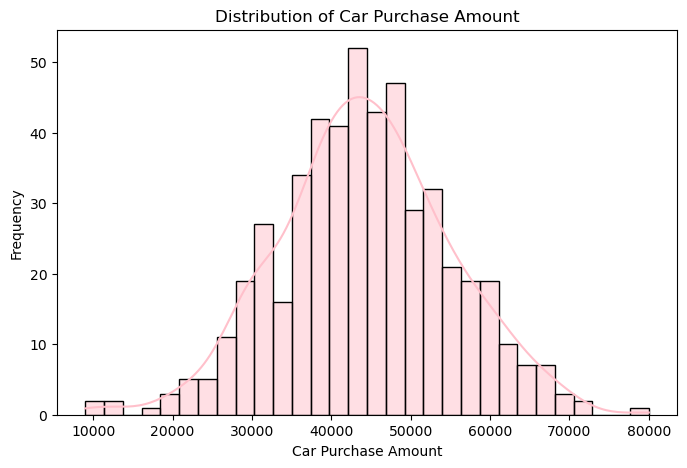

In [14]:
# Distribution of the target variable "car purchase amount" with custom colors
plt.figure(figsize=(8, 5))
sn.histplot(df["car purchase amount"], bins=30, kde=True, color='pink')
plt.title("Distribution of Car Purchase Amount")
plt.xlabel("Car Purchase Amount")
plt.ylabel("Frequency")
plt.show()

In [15]:
x = df.iloc[:, :-1]  
y = df.iloc[:, -1] 

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((400, 5), (100, 5), (400,), (100,))

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [29]:
y_train

array([289,  42, 418, 457,  17, 309, 214, 207, 276, 166, 158, 359, 171,
       252, 392, 403, 487, 356, 195,  29, 470, 188, 400,  61, 256,  37,
       161, 380, 484,  64, 264, 384, 496, 164, 475, 193, 129, 269, 248,
       146, 330,  72, 405, 413, 116, 114, 299, 303,  60, 100, 437, 218,
       495, 203, 255, 156, 493, 435, 271, 122, 348, 165, 336, 249,  90,
       328, 117, 310,   0,  24,   1, 136, 456, 221,  47, 343, 438, 157,
       409,  46, 411, 366, 481, 147, 286,  41, 342, 244, 421, 107, 318,
       428, 497, 396, 420,  59, 285,  18, 215, 301,  23, 217,  84, 181,
       427, 290, 375, 401, 110, 415, 439,  86, 382, 476,  39, 304,  10,
        25, 227, 234, 465, 386, 152, 360,  75, 344, 389, 155, 199,  76,
       451,   3, 367,  36, 324,  71, 159, 160,  26, 485, 201, 414,  22,
       452, 316,  65, 196, 104, 228,  93,  30, 135,  91, 349, 224,  52,
       144, 243, 321, 230, 297, 376, 398, 472, 113, 258, 223, 162,   5,
       454, 446, 180, 467, 174,  45, 254, 102,  53, 445, 307, 25

In [30]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
pred = dt.predict(x_test)
pred

array([289, 454, 492, 342, 498, 481, 203, 376, 332, 411, 357, 252,  22,
       154, 307, 108, 317,  36, 472, 354, 116,  81, 498, 106,  27, 144,
       499, 486, 410, 498, 165, 316, 249, 266, 357, 302, 488,  42, 253,
       228, 409, 427,  36,  62, 460, 350, 415,  81,  47, 286, 272, 142,
        81, 115, 392, 252, 300, 118, 115, 255, 399, 201,  61, 323,  73,
       120, 411, 116, 316, 134, 447, 454, 456, 206, 396,  53, 254, 401,
       394, 377, 396, 332, 108, 335, 476,  41,  95, 220,  66,  71,  86,
       365,  98, 128,  30, 336, 230, 435, 203, 373], dtype=int64)

In [32]:
y_test

array([288, 268, 477,  67, 463, 478, 391, 416, 395, 320, 139, 431, 251,
       153, 172, 423, 341,   4, 464, 362, 191, 397, 381, 132, 192, 140,
       482, 325,  12, 388, 422, 284, 186, 443, 232, 168, 473,  55, 210,
       176, 441, 466, 311, 112, 406, 257,  92, 212, 385, 308, 204,  74,
       141, 202, 274, 329, 461, 263, 261, 143, 483, 242,  11, 424, 187,
       417, 459,  85, 235, 322, 462,  35, 455, 426, 458,   9, 189, 355,
        78, 471, 216,  48, 101, 245, 368, 151, 148,  50, 169, 103,  43,
       123,  56, 185,  70, 345, 273, 371, 247, 402], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
accuracy_score(y_test,pred)

0.0